In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import tensorflow as tf

In [4]:
x = tf.range(4, dtype=tf.float32)
x

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 1., 2., 3.], dtype=float32)>

In [5]:
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0           False          True
1       2.0           False          True
2       4.0            True         False
3       3.0           False          True


In [6]:
import tensorflow as tf

X = tf.constant(inputs.to_numpy(dtype=float))
y = tf.constant(targets.to_numpy(dtype=float))
X, y

(<tf.Tensor: shape=(4, 3), dtype=float64, numpy=
 array([[3., 0., 1.],
        [2., 0., 1.],
        [4., 1., 0.],
        [3., 0., 1.]])>,
 <tf.Tensor: shape=(4,), dtype=float64, numpy=array([127500., 106000., 178100., 140000.])>)

In [5]:
x = tf.Variable(x)

In [7]:
# Record all computations onto a tape
with tf.GradientTape() as t:
    y = 2 * tf.tensordot(x, x, axes=1)
y

<tf.Tensor: shape=(), dtype=float32, numpy=28.0>

We already know that the gradient of the function y=2xTx with respect to x should be 4x.
. We can now verify that the automatic gradient computation and the expected result are identical.

In [10]:
x_grad = t.gradient(y, x)
x_grad, x_grad == 4 * x

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 0.,  4.,  8., 12.], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True,  True,  True])>)

### 2.5.5. Discussion
You have now gotten a taste of the power of automatic differentiation. The development of libraries for calculating derivatives both automatically and efficiently has been a massive productivity booster for deep learning practitioners, liberating them so they can focus on less menial. Moreover, autograd lets us design massive models for which pen and paper gradient computations would be prohibitively time consuming. Interestingly, while we use autograd to optimize models (in a statistical sense) the optimization of autograd libraries themselves (in a computational sense) is a rich subject of vital interest to framework designers. Here, tools from compilers and graph manipulation are leveraged to compute results in the most expedient and memory-efficient manner.

For now, try to remember these basics: (i) attach gradients to those variables with respect to which we desire derivatives; (ii) record the computation of the target value; (iii) execute the backpropagation function; and (iv) access the resulting gradient.

Let f(X) = sin(X) . Plot the graph of f and of its derivative f'. Do not exploit the fact that f'(X)=cos(X)
 but rather use automatic differentiation to get the result.

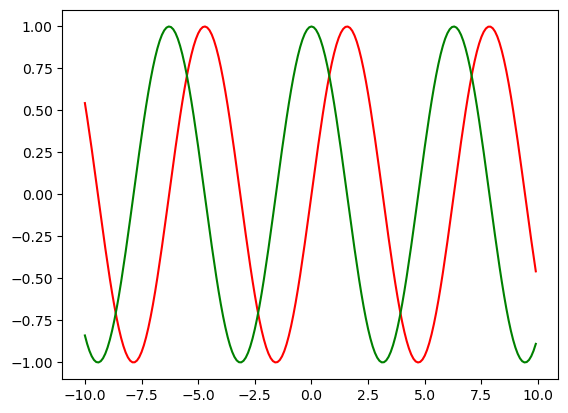

In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

x = tf.range(-10, 10, 0.1)
x = tf.Variable(x)

with tf.GradientTape() as t:
    y = tf.math.sin(x)
    
x_grad = t.gradient(y, x)

# plotting
x = np.arange(-10, 10, 0.1)
plt.figure(1)
plt.plot(x, np.sin(x), color='r')
plt.plot(x, x_grad.numpy(), color='g')
plt.show()